## Задание
#### 1. Поставить задачу Коши для заданной системы ОДУ. Для этого задать произвольные начальные данные.

Используемые библиотеки:

In [1]:
import math as m
import matplotlib.pyplot as plt
import numpy as np

Определение необходимых функций:

##### v' = I_ion(v,w) + I
##### w' = eps * (w_8(v) - w) / r_8(v) + eps2 * w

In [2]:
def m_8(v):
    return 0.5 * ( 1 + m.tanh((v+0.01)/0.15) )

def w_8(v):
    return 0.5 * ( 1 + m.tanh(v/0.3))

def r_8(v):
    return 1 / m.cosh(v/0.6)

def I_ion(v,w):
    return g_Ca*m_8(v) + g_K*w*(v_K-v) + g_L*(v_L-v)

def v(t,y):
    return I_ion(y[0],y[1])+I

def u(t,y):
    return eps * (w_8(y[0])-y[1]) / r_8(y[0]) + eps2*y[1]

def F(t,y):
    return np.array([u(t,y),v(t,y)])

Задание начальных данных:

In [3]:
I = 0.23
g_Ca = 1.1
g_K = 2.0
g_L = 0.5
v_Ca = 1.0
v_K = -0.7
v_L = -0.5
eps = 0.02
eps2 = 400

#### 2. Решить численно полученную задачу, построить графики зависимости решения от времени а также фазовый портрет решения. Вычисления вести до заданного момента времени T

Метод Адамса-Башфорта 3-го порядка. Возвращает сеточную функцию решения и массив узлов

In [4]:
def AdamsBashforthThreeStep(Y0,t0,T,N,F):
    h = (T-t0) / N
    
    start_values = RungeKuttaThirdOrder(Y0,t0, 2*h+t0 ,2,F)
    
    Y = [0 for i in range(N+1)]
    Y[0], Y[1], Y[2] = Y0, start_values[1], start_values[2]
    t = [( t0 + i*h) for i in range(N+1)]
 
    for i in range(3,N+1):
        Y[i] = Y[i-1] + (h/12) * ( 23*F(t[i-1],Y[i-1]) - 16*F(t[i-2],Y[i-2]) + 5*F(t[i-3],Y[i-3]) )
    
    Y = np.array(list(map(np.array,Y)))
    return Y, t

Метод Адамса-Башфорта 3-го порядка. Возвращает значение функции в момент времени T (Для вычисления старшего показателя Ляпунова не требуется хранить всю функцию решения)

In [5]:
def AdamsBashforthThreeStepLast(Y0,t0,T,N,F):
    h = (T-t0) / N
    
    start_values = RungeKuttaThirdOrder(Y0,t0, 2*h+t0 ,2,F)
        
    Y = [0,0,0,0]
    Y[0], Y[1], Y[2] = Y0, start_values[1], start_values[2]
    t = [( t0 + i*h) for i in range(N+1)]

    
    for i in range(3,N+1):
        Y[3] = Y[2] + (h/12) * ( 23*F( t0 + (i-1)*h ,Y[2]) - 16*F( t0 + (i-2)*h ,Y[1]) + 5*F( t0 + (i-3)*h ,Y[0]) )
        Y[0] = Y[1]
        Y[1] = Y[2]
        Y[2] = Y[3]
    
    return np.array(Y[3])

Одношаговый метод Рунге-Кутты 3-го порядка для нахождения стартовых значений для трехшагового метода Адамса-Башфорта

In [6]:
def RungeKuttaThirdOrder(Y0,t0,T,N,F):
    h= (T-t0) / N
    Y = [0 for i in range(N+1)]
    Y[0] = Y0
    t = [( t0 + i*h) for i in range(N+1)]
     
    for i in range(1,N+1):
        f1 = F(t[i-1], Y[i-1])
        f2 = F(t[i-1]+h/2, Y[i-1]+(h/2)*f1)
        f3 = F(t[i-1]+h, Y[i-1] - h*f1 + 2*h*f2)
        Y[i] = Y[i-1]+(h/6)*(f1+4*f2+f3)
        
    Y = np.array(list(map(np.array,Y)))
    return Y

Значение времени и количество узлов

In [7]:
T = 50
N = 50000

In [8]:
otv, t = AdamsBashforthThreeStep(np.array([0,0]), 0, T, N, F)

In [9]:
y1 = [el[0] for el in otv]
y2 = [el[1] for el in otv]

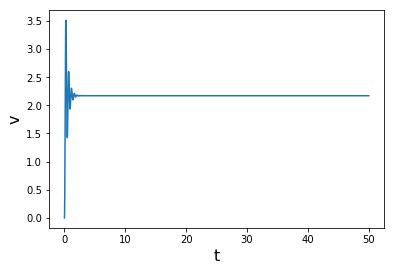

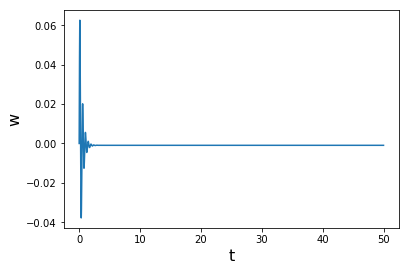

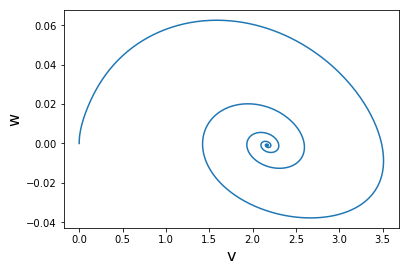

In [10]:
plt.plot(t,y1)
plt.xlabel('t', fontsize=16)
plt.ylabel('v', fontsize=16)
plt.show()
plt.plot(t,y2)
plt.xlabel('t', fontsize=16)
plt.ylabel('w', fontsize=16)
plt.show()
plt.plot(y1,y2)
plt.xlabel('v', fontsize=16)
plt.ylabel('w', fontsize=16)
plt.show()

#### 3. Экспериментально исследовать полученное решение на устоячивость. 

Функция нахождения нормы разности решений:

In [11]:
def NormOfSolutions(a,b):
    t = [np.abs(a[i]-b[i]) for i in range(len(a))]
    ans = [0 for i in range(len(a[0]))]
    for i in range(len(a)):
        for j in range(len(a[0])):
            ans[j] = max(ans[j],t[i][j])
    return ans

In [12]:
delta = 0.01
otv2, t = AdamsBashforthThreeStep(np.array([0+delta,0+delta]), 0, T, N, F) 

In [13]:
n = NormOfSolutions(otv,otv2)

In [14]:
n

[0.38484053754979364, 0.013441609637282498]

Решение устойчиво

#### 4. Построить сечения Пуанкаре для решения системы ОДУ плоскотями v = V_const, w = W_const

In [15]:
V_const = 2.3
W_const = 0.005

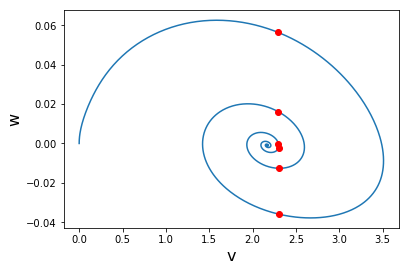

In [16]:
plt.plot(y1,y2)
plt.xlabel('v', fontsize=16)
plt.ylabel('w', fontsize=16)
plane_V = [V_const for i in range(len(y1))]
idx = np.argwhere(np.diff(np.sign(np.array(plane_V) - np.array(y1))) != 0).reshape(-1) + 0
plt.plot(np.array(y1)[idx], np.array(y2)[idx], 'ro')
plt.show()

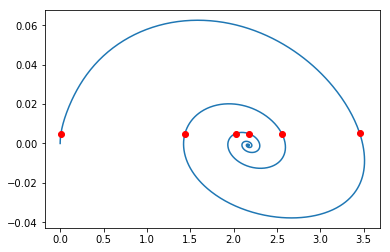

In [17]:
plt.plot(y1,y2)
plane_W = [W_const for i in range(len(y2))]
idx = np.argwhere(np.diff(np.sign(np.array(plane_W) - np.array(y2))) != 0).reshape(-1) + 0
plt.plot(np.array(y1)[idx], np.array(y2)[idx], 'ro')
plt.show()

#### 5. Для каждой компоненты решения построить график автокорелляционной функции

In [18]:
def DrawAutocorrelation(t,y,N):
    n = len(t)
    R = [SimpHelp(t,y,i) for i in range(N)]
    plt.plot(R,t[:N])
    plt.show()
    
def SimpHelp(t,y,i):
    ans = 0
    new_t = [t[i] for i in range(0,len(t),i+1)]
    temp_y = [y[i] for i in range(0,len(t),i+1)]
    new_y = []
    for i in range(len(temp_y)-1):
        new_y.append(temp_y[i]*temp_y[i+1])
    return Simpson(t[1]-t[0],new_y)

# Вычисление интеграла методом Симпсона
def Simpson(h,y):
    n = len(y)
    I = y[0] + y[n-1]
    for i in range(1,(n+1)//2):
        I += 4 * y[2*i-1]
    for i in range(1,n//2):
        I += 2 * y[2*i]
    return I*h/3
    
def EuclNorm(v):
    n = 0
    for el in v:
        n += el**2
    return n**(1/2)
    

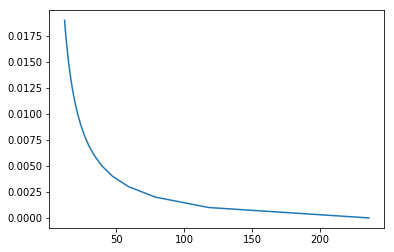

In [19]:
DrawAutocorrelation(t,y1,20)

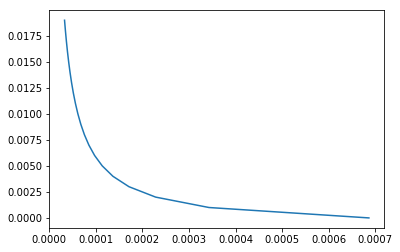

In [20]:
DrawAutocorrelation(t,y2,20)

#### 5. Вычислить старший ляпуновский показатель

In [21]:
def LyapunovIndex(T,eps,M,h,x0):
    N = int(T / h)
    x = x0
    L = 0
    for i in range(M):
        x, y = LyapunovStep(x,i*T,(i+1) * T,N,F,eps)
        L += m.log(EuclNorm(y-x) / eps)
           
    return L / M / T
        
      
def LyapunovStep(x0,t,T,N,F,eps):
    rez1 = AdamsBashforthThreeStepLast(x0,t,T,N,F)
    delta = eps / EuclNorm(x0)
    rez2 = AdamsBashforthThreeStepLast(x0+delta*x0,t,T,N,F)
    return rez1, rez2 

In [22]:
LyapunovIndex(5,1,5, T/N, otv[N-1])

-2.602892617306192

Отрицательный ляпуновский показатель говорит о существовании неподвижной притягивающей точки